# Ojective : 
## Predicting if the new incoming patient has diabetes or not

In [3]:
#lets import some of the libraries 

import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data =pd.read_csv("diabetes.csv")


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
mean=data['BloodPressure'].mean()

In [9]:
data['BloodPressure']=data['BloodPressure'].replace(0,mean)

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62.0000,35,0,33.6,0.127,47,1
1,0,84,82.0000,31,125,38.2,0.233,23,0
2,0,145,69.1455,0,0,44.2,0.630,31,1
3,0,135,68.0000,42,250,42.3,0.365,24,1
4,1,139,62.0000,41,480,40.7,0.536,21,0


In [19]:
mean=data['Glucose'].mean()


In [20]:
data['Glucose']=data['Glucose'].replace(0,mean)

In [27]:
mean=data['SkinThickness'].mean()

20.935

In [28]:
data['SkinThickness']=data['SkinThickness'].replace(0,mean)

In [30]:
mean=data['Insulin'].mean()
data['Insulin']=data['Insulin'].replace(0,mean)

In [32]:
mean=data['BMI'].mean()
data['BMI']=data['BMI'].replace(0,mean)

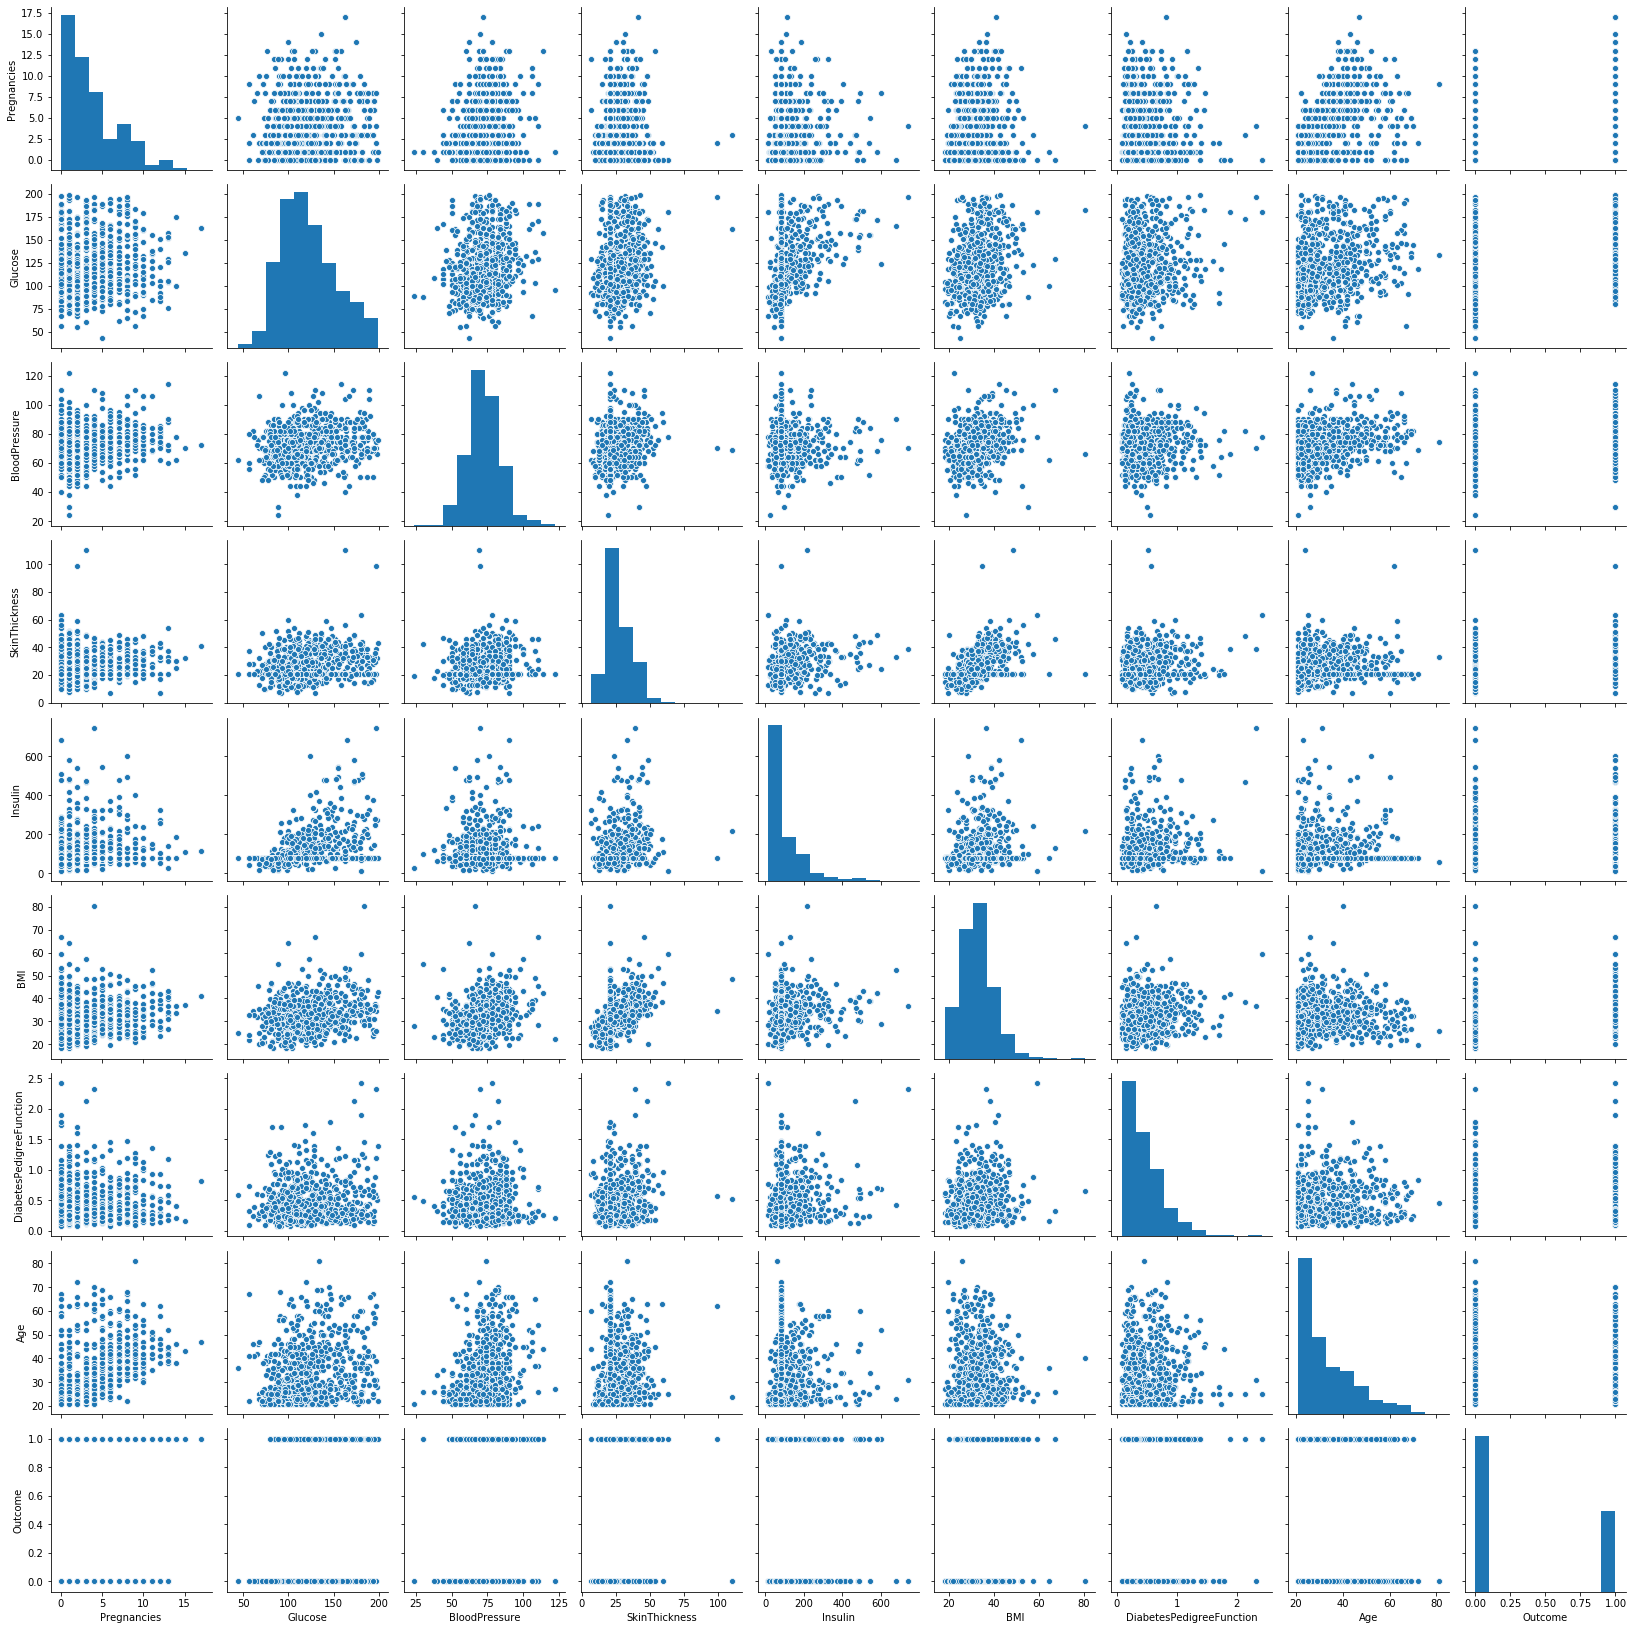

In [33]:
sns.pairplot(data)

# lets split the data into training and testing dataset

In [36]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47,1
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23,0
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31,1
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24,1
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21,0


In [38]:
x=data.drop('Outcome',axis=1)
y=data.pop('Outcome')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0000,24.000,55.000,29.7,0.370,33
1996,8,179.0,72.0000,42.000,130.000,32.7,0.719,36
1997,6,85.0,78.0000,20.935,80.254,31.2,0.382,42
1998,0,129.0,110.0000,46.000,130.000,67.1,0.319,26


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=7)

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()  # in knn we do scaling 

In [46]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# lets bring KNN into play using sklearn

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=7,weights='distance')

In [97]:
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)

# the model is built .... so lets check the accuracy measures 

In [98]:
from sklearn.metrics import classification_report as cr
cr(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       392\n           1       0.94      0.91      0.92       208\n\n    accuracy                           0.95       600\n   macro avg       0.94      0.94      0.94       600\nweighted avg       0.95      0.95      0.95       600\n'

In [99]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test,y_pred)

array([[379,  13],
       [ 19, 189]], dtype=int64)

In [100]:
accuracy = (379+189)/(379+189+19+13)
accuracy

0.9466666666666667

In [101]:
# the accuracy given by KNN 94.66% is a quite good but we have to tune it more  to get better results fine tune k value 

# let us give some new input 

In [102]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21


# xnew data is as follows 
### pregnancies =1 ,Glucose =136,BloodPressure =65,Skin thickness =32,insulin =80.525,bmi =33.6,pedigree =0.125,age = 50

In [103]:
xnew =[[1,136,65,32,80.525,33.6,0.125,50]]

In [104]:
knc.predict(xnew)

array([1], dtype=int64)

# for the xnew data the knn predicted that the new data is non diabeteic 

# lets do this with logistic regression 

In [114]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')

In [115]:
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)

In [116]:
from sklearn.metrics import log_loss
log_loss(y_test,y_predict)

7.483457524050761

In [117]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test,y_predict)

array([[350,  42],
       [ 88, 120]], dtype=int64)

In [118]:
from sklearn.metrics import classification_report as cr
cr(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84       392\n           1       0.74      0.58      0.65       208\n\n    accuracy                           0.78       600\n   macro avg       0.77      0.73      0.75       600\nweighted avg       0.78      0.78      0.78       600\n'

In [119]:
accuracy1 = (350+120)/(350+120+88+42)
accuracy1

0.7833333333333333

In [120]:
lr.predict(xnew)

array([1], dtype=int64)

# accuracy according to logistic regression is 78%  way less than KNN


# lets do this using NaiveBayes classifier 

In [121]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pre=nb.predict(x_test)

In [122]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test,y_pre)

array([[331,  61],
       [ 78, 130]], dtype=int64)

In [123]:
acc =(331+130)/(331+130+78+61)
acc

0.7683333333333333

# accuracy of Naive Bayes is 76.8 simliar to Logistic Regression

nb.predict(xnew)

In [124]:
nb.predict(xnew)

array([1], dtype=int64)

# all the algorithms are predicting the xnew ie the new data to be diabetic